# SVM

In [16]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from util.helpers import id2label, labels

In [17]:
kernel = "linear"
c = 1

In [18]:
df = pd.read_csv('../../dataset/cleaned_arguments_in_context_learning.csv')


In [19]:
df["label"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [20]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [21]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# SVM
svm = SVC(kernel=kernel, C=c, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [23]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

0.26331955922865014


Privatperson
Offentlig forvaltning
Interessegruppe
Frivillig organisasjon
Privatperson
Offentlig forvaltning
Interessegruppe
Politisk parti
Privatperson
Politisk parti
Interessegruppe
Privatperson
Interessegruppe
Interessegruppe
Privatperson
Politisk parti
Politisk parti
Politisk parti
Interessegruppe
Interessegruppe
Offentlig forvaltning
Offentlig forvaltning
Offentlig forvaltning
Bedrift
Bedrift
Interessegruppe
Privatperson
Bedrift
Interessegruppe
Interessegruppe
Akademisk institusjon
Interessegruppe
Politisk parti
Interessegruppe
Politisk parti
Frivillig organisasjon
Interessegruppe
Privatperson
Offentlig forvaltning
Interessegruppe
Privatperson
Interessegruppe
Interessegruppe
Privatperson
Politisk parti
Bedrift
Interessegruppe
Interessegruppe
Politisk parti
Interessegruppe
Offentlig forvaltning
Bedrift
Privatperson
Offentlig forvaltning
Interessegruppe
Frivillig organisasjon
Offentlig forvaltning
Offentlig forvaltning
Bedrift
Interessegruppe
Akademisk institusjon
Interessegruppe
Pr

<Axes: >

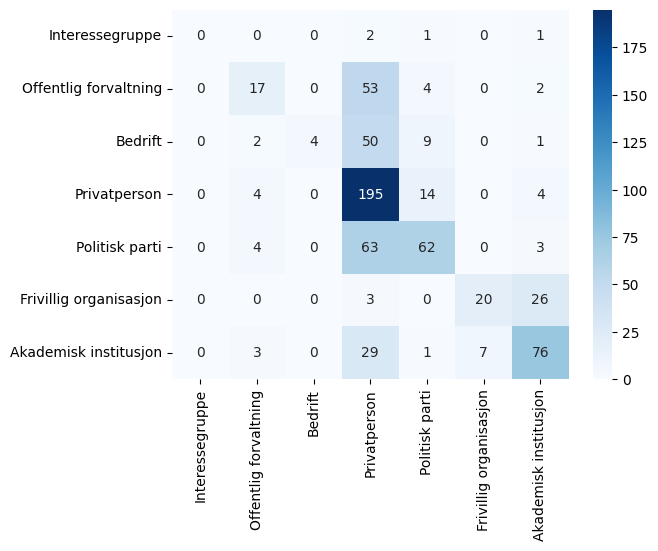

In [24]:
from util.helpers import id2label, labels


y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

labels = labels()

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

## SVM with count vectorizer

In [25]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(set(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# SVM
svm = SVC(kernel=kernel, C=c, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [27]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

0.2203650137741047


<Axes: >

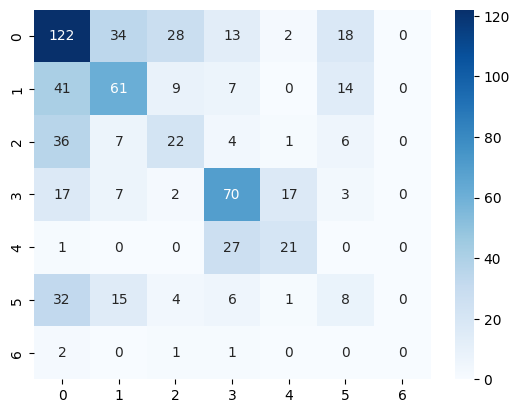

In [28]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

## SVM with word2vec

In [29]:
import spacy
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [30]:
nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens

tokenized_docs = [preprocess_text(doc) for doc in df["text"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [31]:
doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

In [32]:


from math import isnan


X = np.array(doc_vectors)
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# SVM model

svm = SVC(kernel=kernel, C=c, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [34]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

0.26984159779614325


<Axes: >

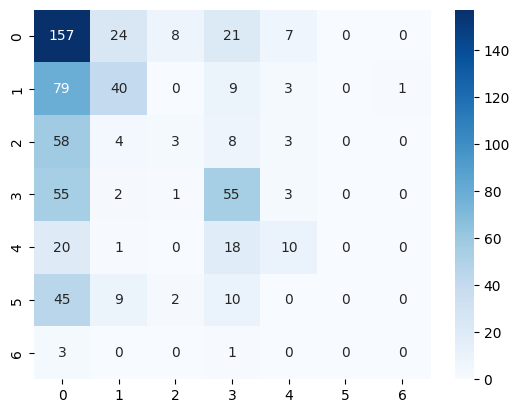

In [35]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)